In [2]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error
import random

In [ ]:
all_genes = pd.read_csv('extracted_data/GxG_filled.csv', sep = ',', index_col = 0)
all_genes

ExE = pd.read_csv('extracted_data/ExE_imputed.csv', sep = ',', index_col = 0)

R2:  -2.8012340449264412
RMSE: 0.14474634531242794


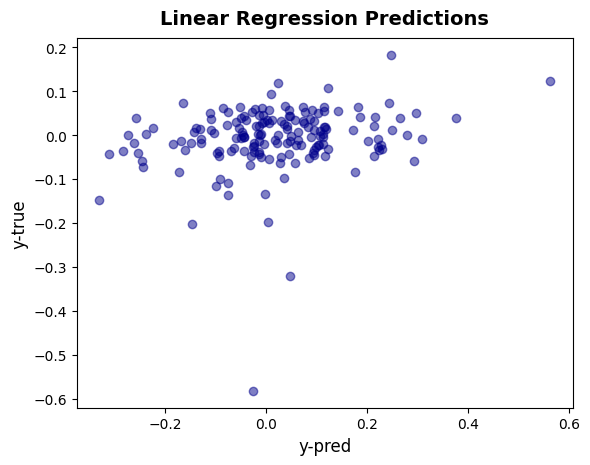

In [ ]:
random.seed(35)

target_column = random.choice(ExE.columns)  # Randomly pick a column name

X = ExE.drop(columns=[target_column])  # Features (all columns except the target)
y = ExE[target_column]  # Target variable (the randomly selected column)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lm = LinearRegression().fit(X_train, y_train)
y_pred = lm.predict(X_test)

print('R2: ', lm.score(X_test, y_test))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

plt.scatter(y_pred, y_test, alpha=0.5, c='darkblue')
plt.xlabel("y-pred", fontsize=12)
plt.ylabel("y-true", fontsize=12)
plt.title("Linear Regression Predictions", fontweight='bold', fontsize=14, pad=10)
plt.show()


try the same after Running PCA?

0.9189095672935689


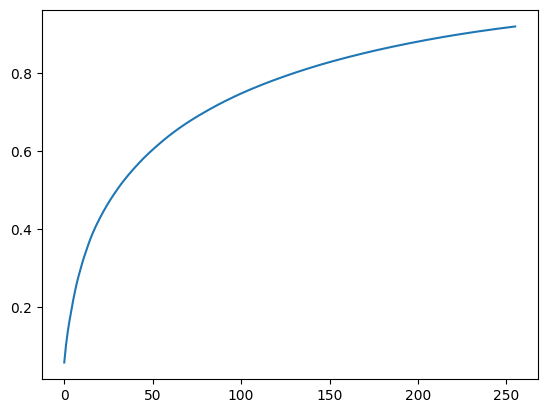

In [ ]:
# Check what is the percentage of the variance explained by compressed data compared to the full data 
N=256
pca = PCA(n_components=N)
pca.fit_transform(X)
ev = pca.explained_variance_ratio_.cumsum()
print(ev[-1])
plt.plot(range(0, N), ev)

In [ ]:
dims = 256
ExE_PCA = pd.DataFrame(PCA(n_components=dims).fit_transform(X))
ExE_PCA

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,-0.039568,-0.084475,-0.369261,0.462704,0.084608,0.032114,0.445043,-0.439129,-0.173629,-0.098687,...,0.001690,0.037718,0.006002,0.023235,0.044336,0.050572,-0.054156,0.051671,-0.011467,0.033320
1,-0.195173,-0.119640,-0.499446,0.484248,-0.099088,0.029015,0.556124,-0.517527,-0.149387,0.119106,...,0.004533,0.059770,-0.037458,-0.028514,0.030915,-0.074239,-0.108916,-0.040941,-0.061538,0.036627
2,-0.965934,-0.425851,0.111023,0.047451,0.065926,-0.162614,-0.021987,-0.100281,-0.146792,0.211429,...,0.094076,-0.044651,-0.119132,0.016126,0.042946,0.123098,-0.021940,0.004455,0.088038,-0.027157
3,0.209558,-0.709145,-0.416124,0.960829,0.149570,-0.076413,0.496485,-0.152249,-0.570292,-0.459679,...,-0.032414,-0.063431,-0.018739,0.085012,-0.032611,-0.070810,-0.017207,-0.041128,-0.055069,0.050369
4,0.158387,0.192778,0.001310,0.233042,-0.239876,-0.235610,0.091810,0.200738,0.169535,-0.218300,...,-0.044958,0.010234,0.042193,-0.029232,0.036162,-0.031354,0.075204,0.001626,0.048284,-0.023657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819,-0.023545,0.116229,-0.052400,-0.180351,0.064571,0.214180,-0.000987,0.104596,0.095983,0.095012,...,0.032824,-0.029180,0.044080,-0.000153,0.044381,-0.021714,-0.015817,-0.108593,-0.059086,-0.013763
820,-0.053004,0.222508,0.134065,0.364712,-0.063889,0.313600,0.018395,-0.180031,-0.076522,-0.098458,...,0.034630,0.058649,0.098290,-0.062591,0.000506,0.060217,-0.027966,-0.060461,0.006270,0.084580
821,-0.106639,0.355992,0.099272,0.288449,0.174299,0.516849,0.150097,-0.204094,-0.193603,-0.005247,...,-0.080471,-0.059057,0.012849,0.022756,0.054051,0.018627,0.028254,-0.031195,0.012108,-0.117185
822,0.062848,0.073557,-0.032103,-0.010570,0.173475,0.251757,0.120945,-0.042406,-0.050842,-0.072770,...,0.021744,-0.040885,-0.008600,-0.002210,-0.001983,0.019737,0.041959,-0.074457,0.029500,-0.039434


R2:  0.05293292863801369
RMSE: 0.07224963715588163


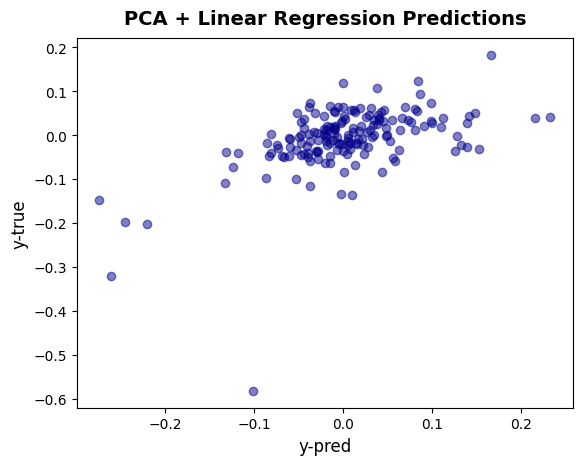

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(ExE_PCA, y, test_size=0.2, random_state=42)

lm = LinearRegression().fit(X_train, y_train)
y_pred = lm.predict(X_test)


print('R2: ', lm.score(X_test, y_test))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


plt.scatter(y_pred, y_test, alpha=0.5, c='darkblue')
plt.xlabel("y-pred", fontsize=12)
plt.ylabel("y-true", fontsize=12)
plt.title("PCA + Linear Regression Predictions", fontweight='bold', fontsize=14, pad=10)
plt.show()

## Try other models

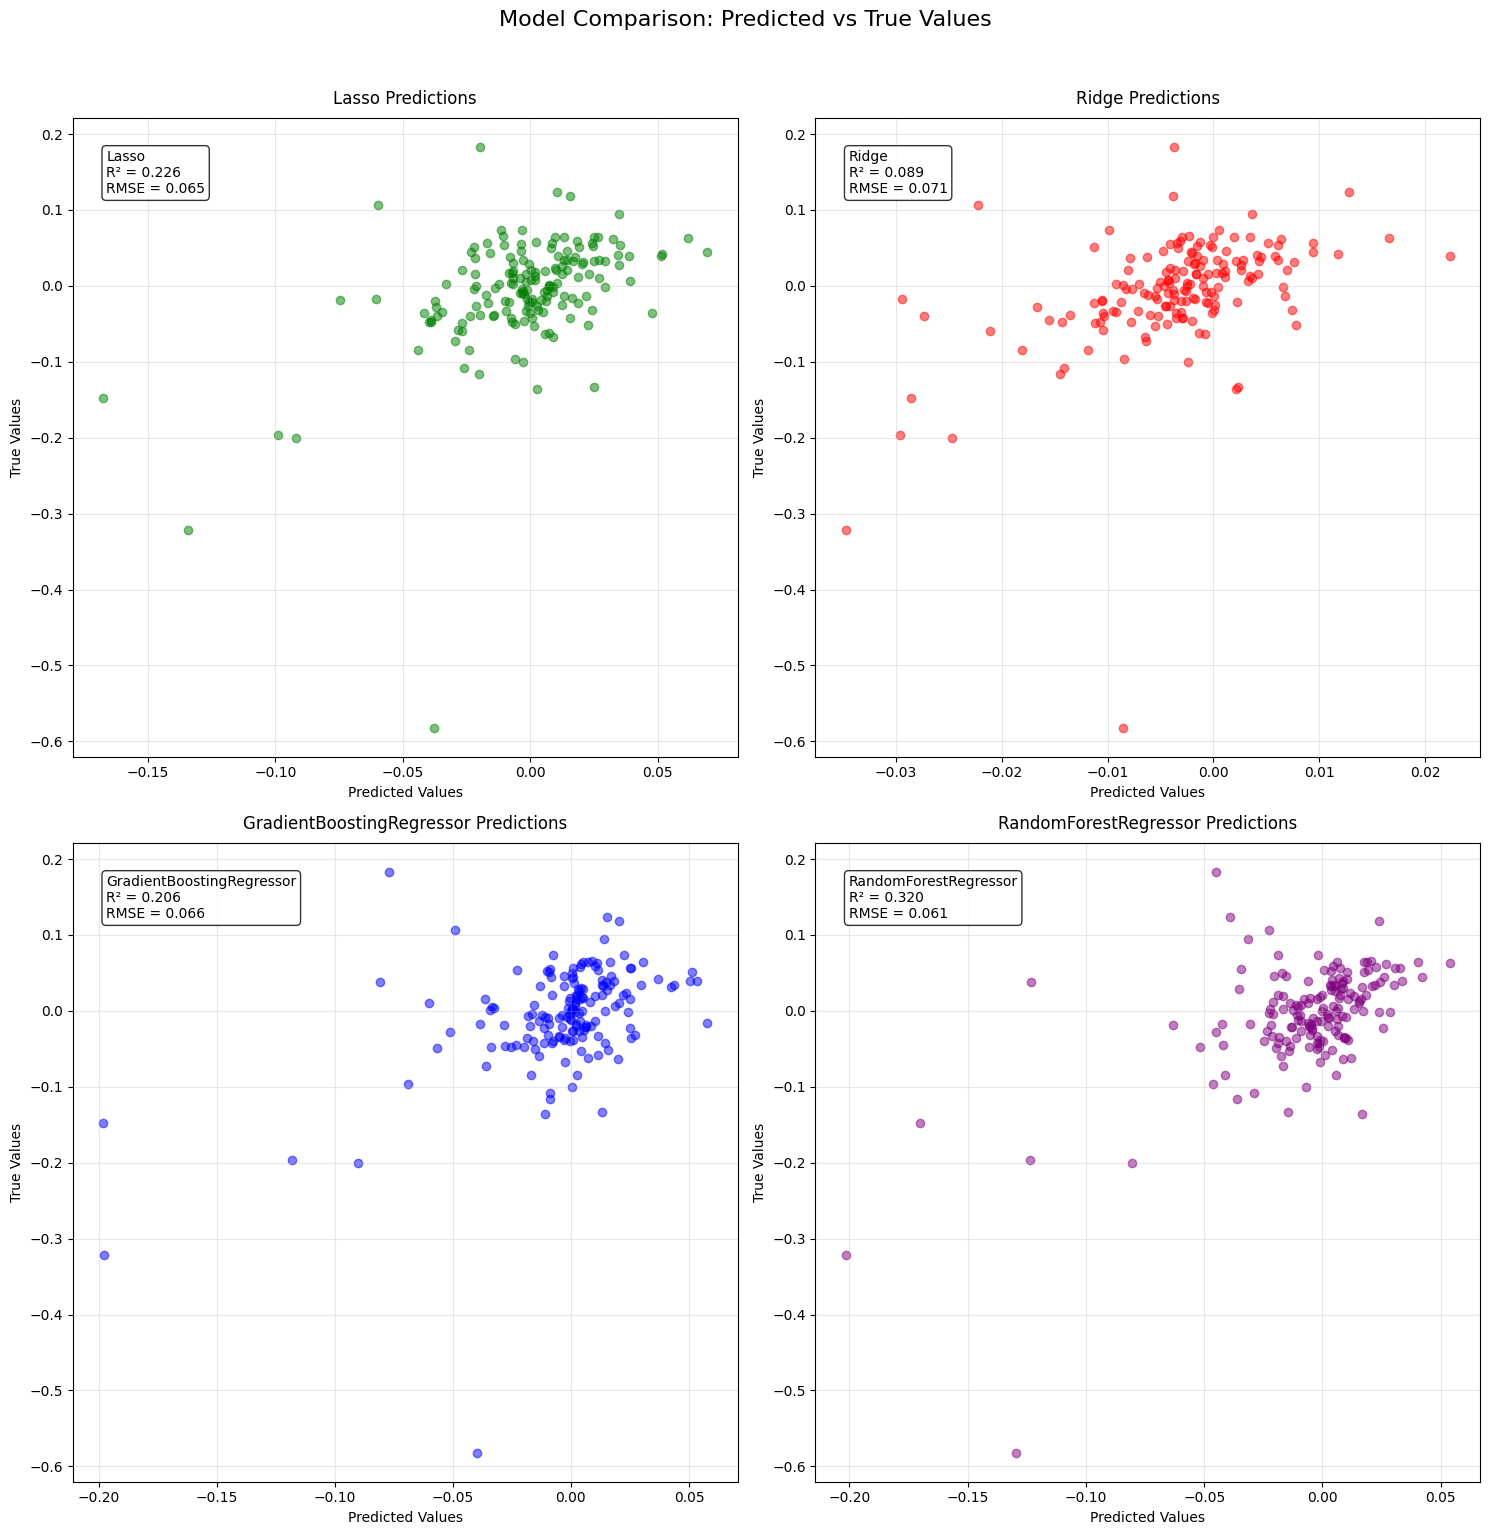

In [ ]:
predictive_models = [  
                      Lasso(alpha=0.0004),
                      Ridge(alpha=200.0),
                      GradientBoostingRegressor(n_estimators=20, learning_rate=0.2, max_depth=3, random_state=48),
                      RandomForestRegressor(n_estimators=20, random_state=42)
]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

fig, axes = plt.subplots(2, 2, figsize=(15, 15))
fig.suptitle('Model Comparison: Predicted vs True Values', fontsize=16, y=1.02)

axes = axes.ravel()

colors = ['green', 'red', 'blue', 'purple']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for idx, (model, ax, color) in enumerate(zip(predictive_models, axes, colors)):

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    ax.scatter(y_pred, y_test, alpha=0.5, color=color)
        
    model_name = model.__class__.__name__
    ax.text(0.05, 0.95, 
            f'{model_name}\nR² = {r2:.3f}\nRMSE = {rmse:.3f}',
            transform=ax.transAxes,
            verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    ax.set_xlabel('Predicted Values')
    ax.set_ylabel('True Values')
    ax.set_title(f'{model_name} Predictions', pad=10)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


Epoch 1/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0035 - mse: 0.0035 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0012 - mse: 0.0012 - val_loss: 0.0036 - val_mse: 0.0036
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.5148e-04 - mse: 5.5148e-04 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.7916e-04 - mse: 3.7916e-04 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.4932e-04 - mse: 3.4932e-04 - val_loss: 0.0037 - val_mse: 0.0037
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7702e-04 - mse: 2.7702e-04 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6394e-04 - mse: 1.6394e-04 - val_loss: 0.0037 - val_mse: 0.0037
Epoch 9/50
17/17 ━━━━━━━━━━━━━━━

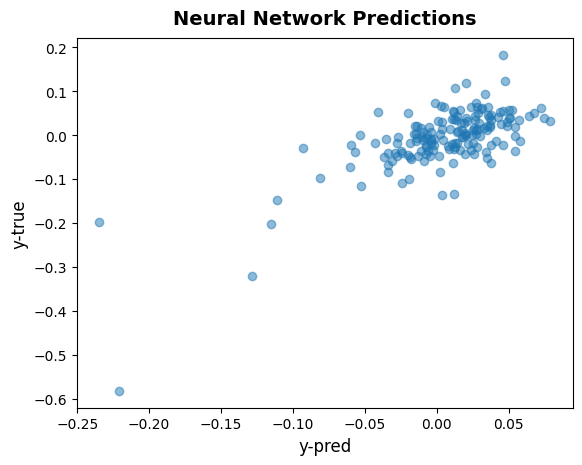

In [ ]:
# And Neural Network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mse'])

model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, verbose=1)

loss, mae = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)
print('R2:', r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

plt.scatter(y_pred, y_test, alpha=0.5)
plt.xlabel("y-pred", fontsize=12)
plt.ylabel("y-true", fontsize=12)
plt.title("Neural Network Predictions", fontweight='bold', fontsize=14, pad=10)
plt.show()